In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

## EDA Doença Crônica nos Rins


| **Variável**                  | **Abreviação** | **Tipo**    | **Unidade/Valores**                         |
|-------------------------------|---------------|-------------|---------------------------------------------|
| Age                            | age           | Numérico    | anos                                        |
| Blood Pressure                 | bp            | Numérico    | mm/Hg                                       |
| Specific Gravity               | sg            | Nominal     | (1.005, 1.010, 1.015, 1.020, 1.025)         |
| Albumin                        | al            | Nominal     | (0, 1, 2, 3, 4, 5)                          |
| Sugar                          | su            | Nominal     | (0, 1, 2, 3, 4, 5)                          |
| Red Blood Cells                | rbc           | Nominal     | (normal, abnormal)                          |
| Pus Cell                       | pc            | Nominal     | (normal, abnormal)                          |
| Pus Cell Clumps                | pcc           | Nominal     | (present, notpresent)                       |
| Bacteria                       | ba            | Nominal     | (present, notpresent)                       |
| Blood Glucose Random           | bgr           | Numérico    | mgs/dl                                      |
| Blood Urea                     | bu            | Numérico    | mgs/dl                                      |
| Serum Creatinine               | sc            | Numérico    | mgs/dl                                      |
| Sodium                         | sod           | Numérico    | mEq/L                                       |
| Potassium                      | pot           | Numérico    | mEq/L                                       |
| Hemoglobin                     | hemo          | Numérico    | gms                                         |
| Packed Cell Volume             | pcv           | Numérico    |                                             |
| White Blood Cell Count         | wc            | Numérico    | cells/cumm                                  |
| Red Blood Cell Count           | rc            | Numérico    | millions/cmm                                |
| Hypertension                   | htn           | Nominal     | (yes, no)                                   |
| Diabetes Mellitus              | dm            | Nominal     | (yes, no)                                   |
| Coronary Artery Disease        | cad           | Nominal     | (yes, no)                                   |
| Appetite                       | appet         | Nominal     | (good, poor)                                |
| Pedal Edema                    | pe            | Nominal     | (yes, no)                                   |
| Anemia                         | ane           | Nominal     | (yes, no)                                   |
| Class                          | class         | Nominal     | (ckd, notckd)                               |



1. Preparar os dados
2. Analise descritivia (Medidas de posicao e dispersao,  )
3. Graficos
4. Correlacao
5. Outliers
6. Tratar missing values



[Link para o dataset](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease)

## 1. Análise Inicial

In [2]:
df = pd.read_csv('data/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#Dimenssão do dataset
print("Número de linhas: ", df.shape[0])
print("Número de colunas: ", df.shape[1])

Número de linhas:  400
Número de colunas:  26


## 2. Preparação dos dados

In [4]:
#Drop coluna de id
df.drop('id',axis=1 ,inplace=True)

In [5]:
#Renomear colunas para um melhor entendimento
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Alguns dados estão representados por tipos que inadequados:
1. age (float) -> (int)
2. specific_gravity(float) -> nominal
2. albumin (float) -> nominal (int)
3. sugar (float) -> nominal (int)

4. packed_cell_volume(object) -> (int)
5. white_blood_cell_count (object) -> (int)
6. red_blood_cell_count (object) -> (int)

In [7]:
#Realizar a transformação de tipo dos dados:

#Converter idade float64 -> Int64
df['age'] = df['age'].astype('Int64')

df['specific_gravity'] = df['specific_gravity'].astype('object')
df['albumin'] = df['albumin'].astype('object')
df['sugar'] = df['sugar'].astype('object')


df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    Int64  
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    object 
 3   albumin                  354 non-null    object 
 4   sugar                    351 non-null    object 
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
#Separar features categoricas de numericas
categ_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

In [10]:
#Checar os valores unicos
for col in categ_cols:
    print(f"{col} valores: {df[col].unique()}\n")

specific_gravity valores: [1.02 1.01 1.005 1.015 nan 1.025]

albumin valores: [1.0 4.0 2.0 3.0 0.0 nan 5.0]

sugar valores: [0.0 3.0 4.0 1.0 nan 2.0 5.0]

red_blood_cells valores: [nan 'normal' 'abnormal']

pus_cell valores: ['normal' 'abnormal' nan]

pus_cell_clumps valores: ['notpresent' 'present' nan]

bacteria valores: ['notpresent' 'present' nan]

hypertension valores: ['yes' 'no' nan]

diabetes_mellitus valores: ['yes' 'no' ' yes' '\tno' '\tyes' nan]

coronary_artery_disease valores: ['no' 'yes' '\tno' nan]

appetite valores: ['good' 'poor' nan]

peda_edema valores: ['no' 'yes' nan]

anemia valores: ['no' 'yes' nan]

class valores: ['ckd' 'ckd\t' 'notckd']



Percebemos que as colunas diabetes_mellitus, coronary_artery_disease e class possui valores repetidos
precisamos remover essas repeticoes


In [11]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [12]:
#Encode class
df['class'] = df['class'].map({'ckd': 1, 'not ckd': 0})

In [13]:
for col in ['diabetes_mellitus', 'coronary_artery_disease', 'class']:
    print(f"{col} -> valores: {df[col].unique()}\n")

diabetes_mellitus -> valores: ['yes' 'no' nan]

coronary_artery_disease -> valores: ['no' 'yes' nan]

class -> valores: [1 0]



In [14]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [15]:
df.describe()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
count,391.0,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,400.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.625000
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.484729
min,2.0,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,42.0,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000
50%,55.0,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,1.000000
75%,64.5,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000
max,90.0,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


## 3. Descrição Estatística

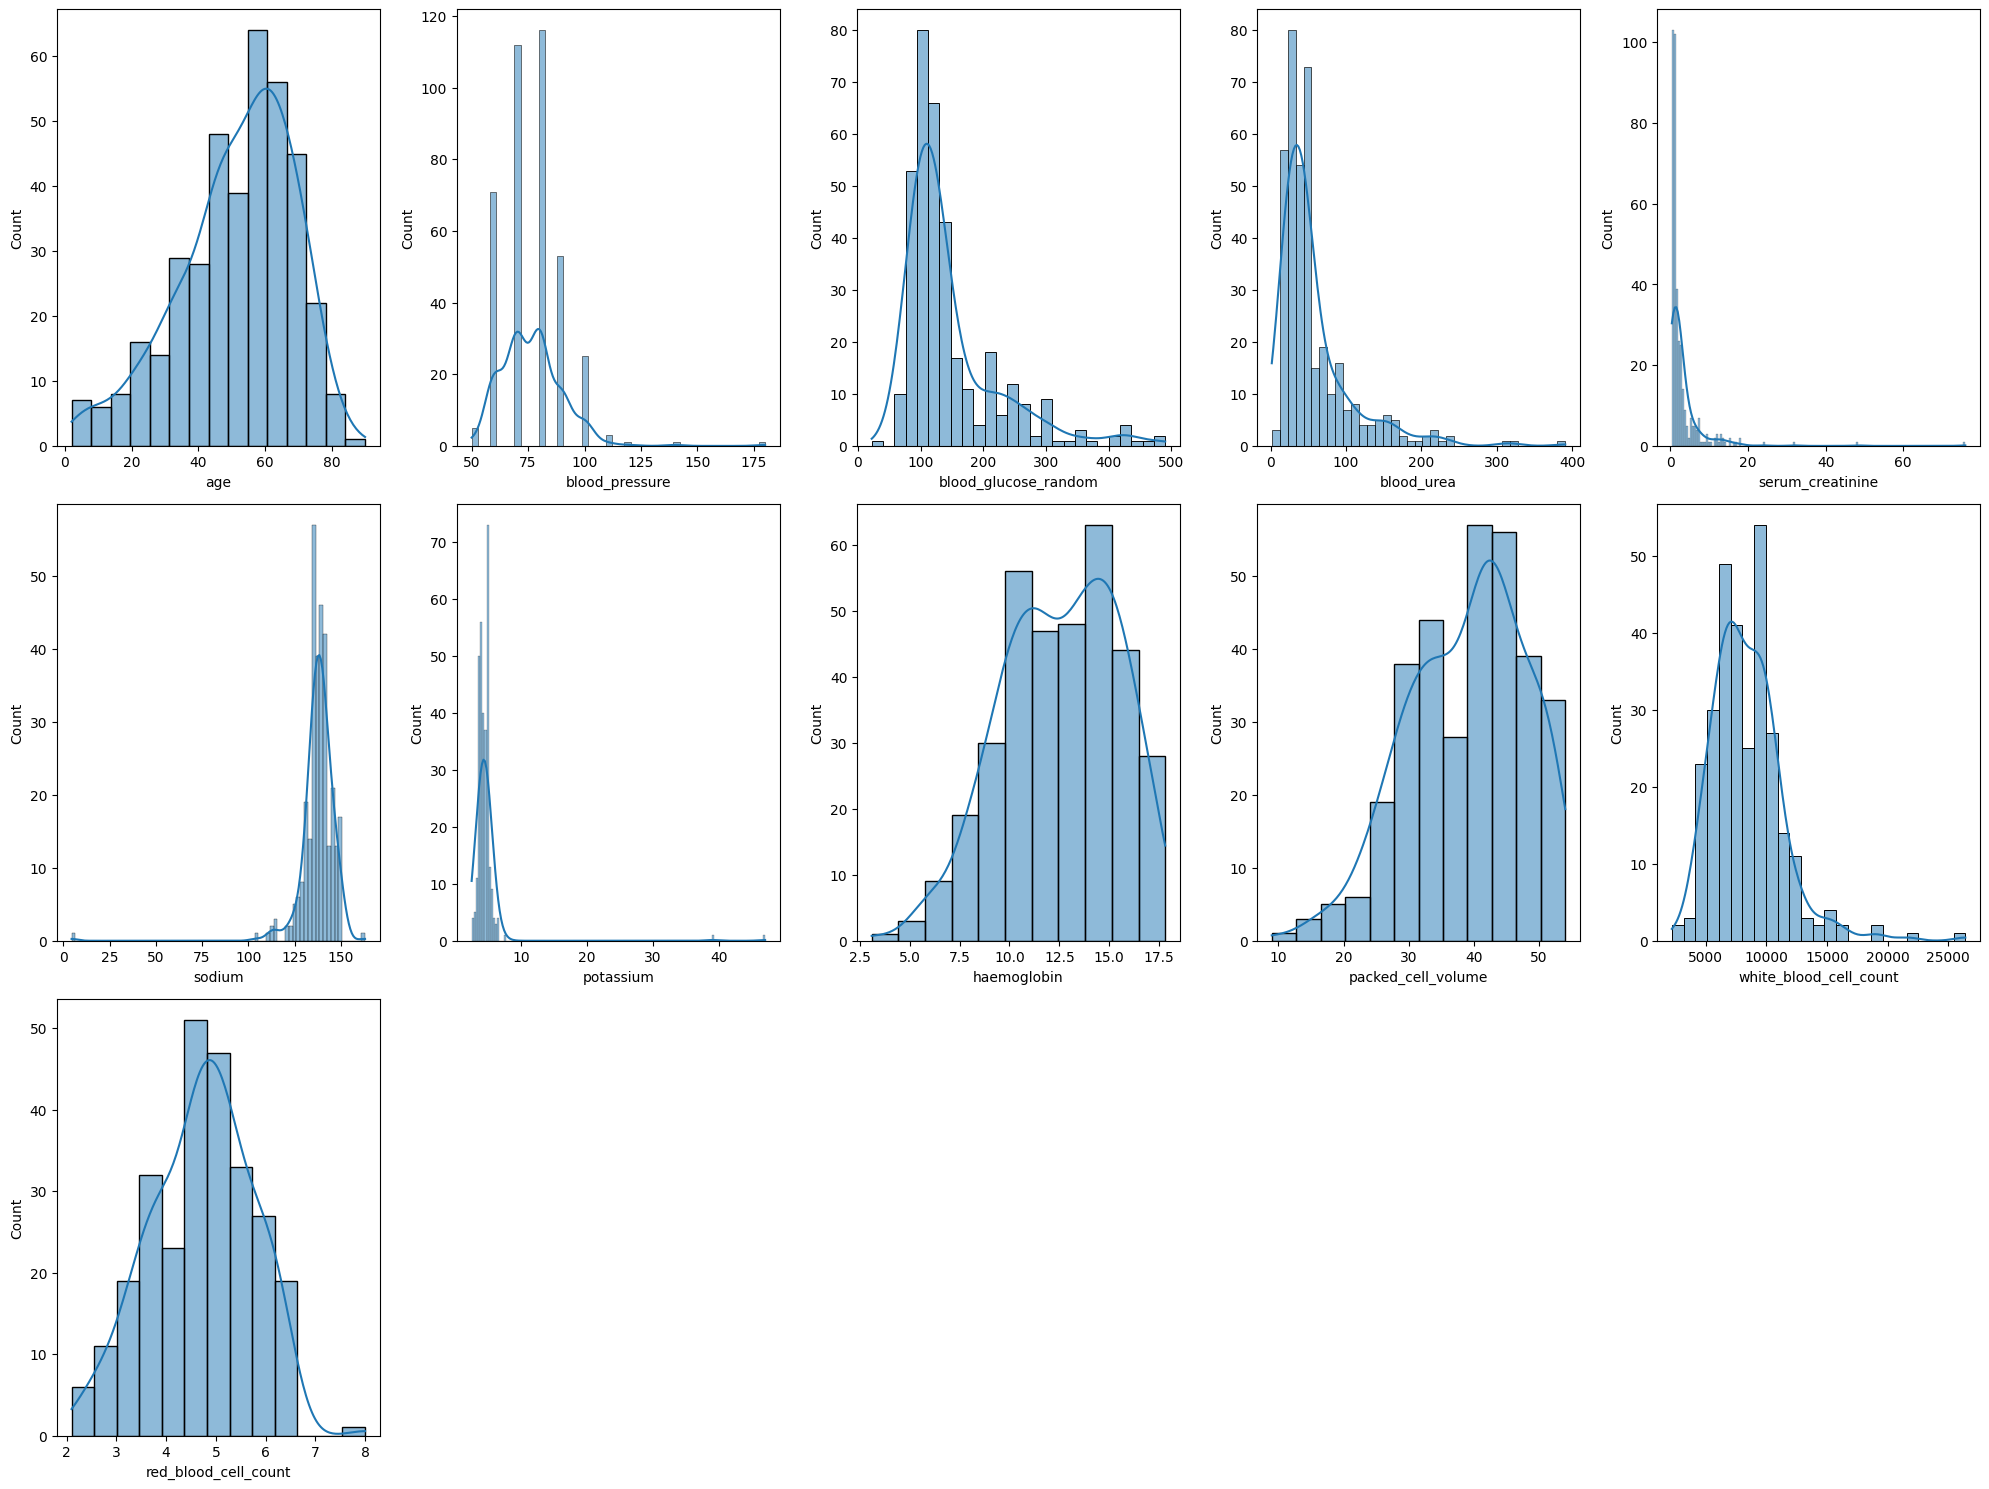

In [16]:
#Numeric distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric_cols:
    ax = plt.subplot(3, 5, plotnumber)
    sns.histplot(x=df[column], ax=ax, kde=True)
    plt.xlabel(column)
    
    plotnumber += 1

plt.tight_layout()
plt.show()

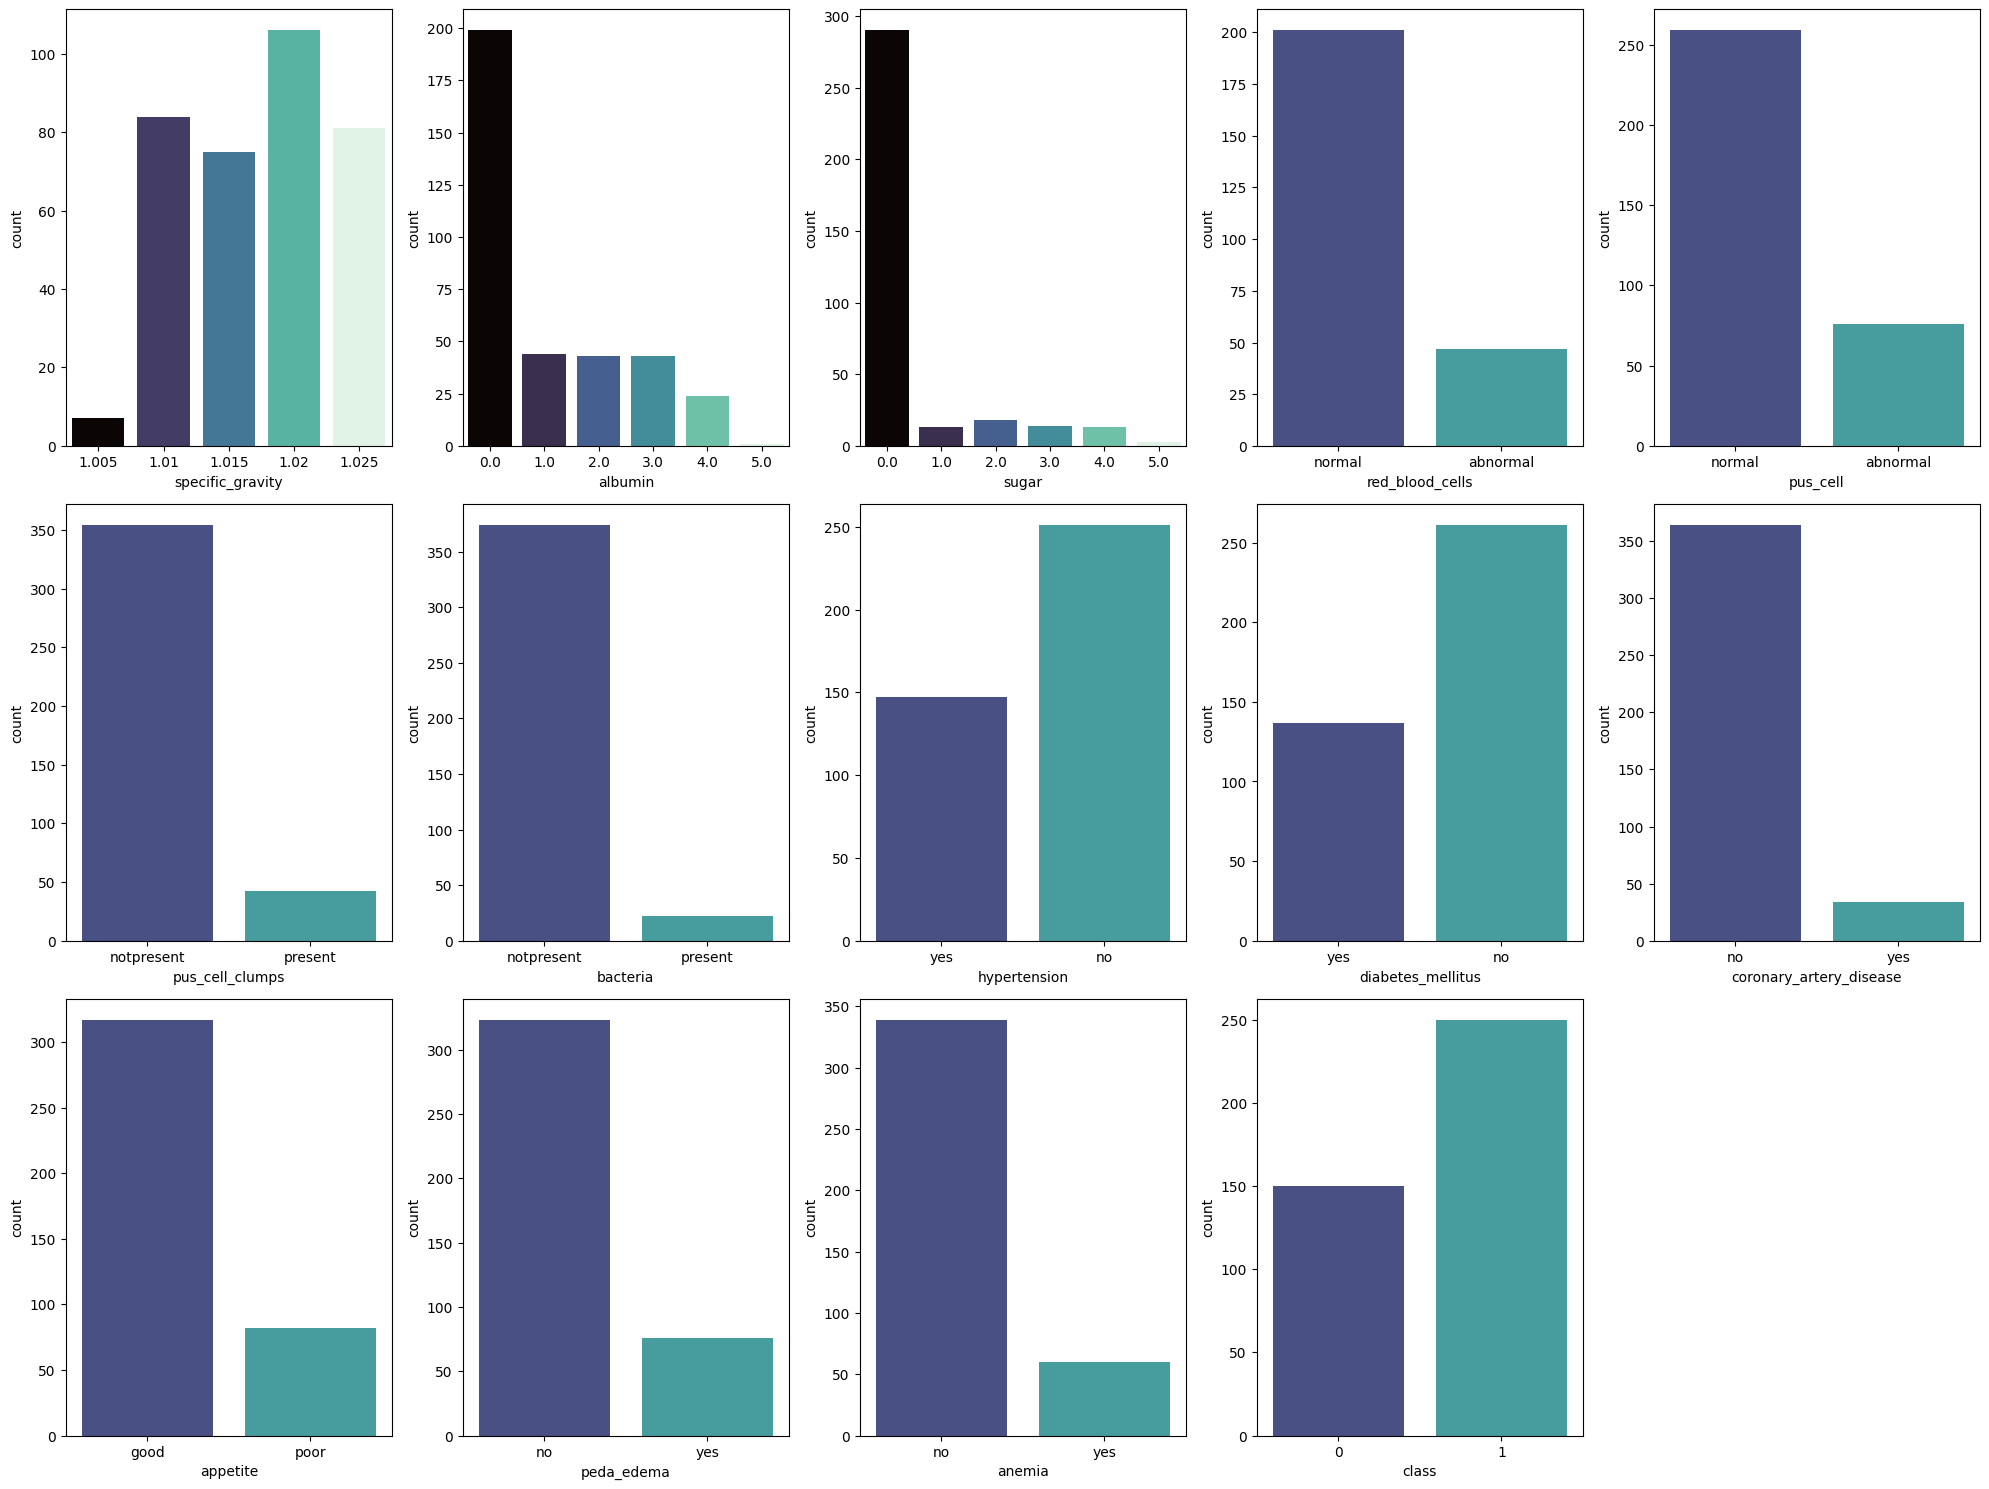

In [17]:
#Categorical

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categ_cols:
    ax = plt.subplot(3, 5, plotnumber)
    sns.countplot(x=df[column], ax=ax, palette='mako',  hue=df[column] , legend=False)
    plt.xlabel(column)
    
    plotnumber += 1

plt.tight_layout()
plt.show()

## 4. Encontrando Correlações

In [18]:
df.corr()

ValueError: could not convert string to float: 'normal'

In [ ]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

ValueError: could not convert string to float: 'normal'

<Figure size 1500x800 with 0 Axes>